In [38]:
import requests
import json

api_key = 'dbrKFnXTyvxi38gkAzul8UxeZpGybdlt'

cities = ['Moscow', 'Tomsk', 'Paris']

weather_data = {}

for city in cities:
    url = f'https://api.tomorrow.io/v4/timelines?location={city}&fields=temperature&timesteps=current&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    weather_data[city] = data

for city, data in weather_data.items():
    print(f"Weather in {city}:")
    print(data)
    print()

with open('weather_data.json', 'w') as file:
    json.dump(weather_data, file)

print("Данные о погоде сохранены в файл 'weather_data.json'")

Weather in Moscow:
{'data': {'timelines': [{'timestep': 'current', 'endTime': '2024-10-28T19:23:00Z', 'startTime': '2024-10-28T19:23:00Z', 'intervals': [{'startTime': '2024-10-28T19:23:00Z', 'values': {'temperature': 21.88}}]}]}}

Weather in Tomsk:
{'data': {'timelines': [{'timestep': 'current', 'endTime': '2024-10-28T19:23:00Z', 'startTime': '2024-10-28T19:23:00Z', 'intervals': [{'startTime': '2024-10-28T19:23:00Z', 'values': {'temperature': 1.19}}]}]}}

Weather in Paris:
{'data': {'timelines': [{'timestep': 'current', 'endTime': '2024-10-28T19:23:00Z', 'startTime': '2024-10-28T19:23:00Z', 'intervals': [{'startTime': '2024-10-28T19:23:00Z', 'values': {'temperature': 12}}]}]}}

Данные о погоде сохранены в файл 'weather_data.json'


In [11]:
pip install hdfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for hdfs: filename=hdfs-2.7.3-py3-none-any.whl size=34324 sha256=94d6ac107cbdfd2896508d366186df7c58446156761e19fff00189777b8c7fb4
  Stored in directory: /root/.cache/pip/wheels/e5/8d/b6/99c1c0a3ac5788c866b0ecd3f48b0134a5910e6ed26011800b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a93d4e809a2163c3c99eb566d49e8405601531cfb1044b48f15eb058b1d7214d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built hdfs docopt


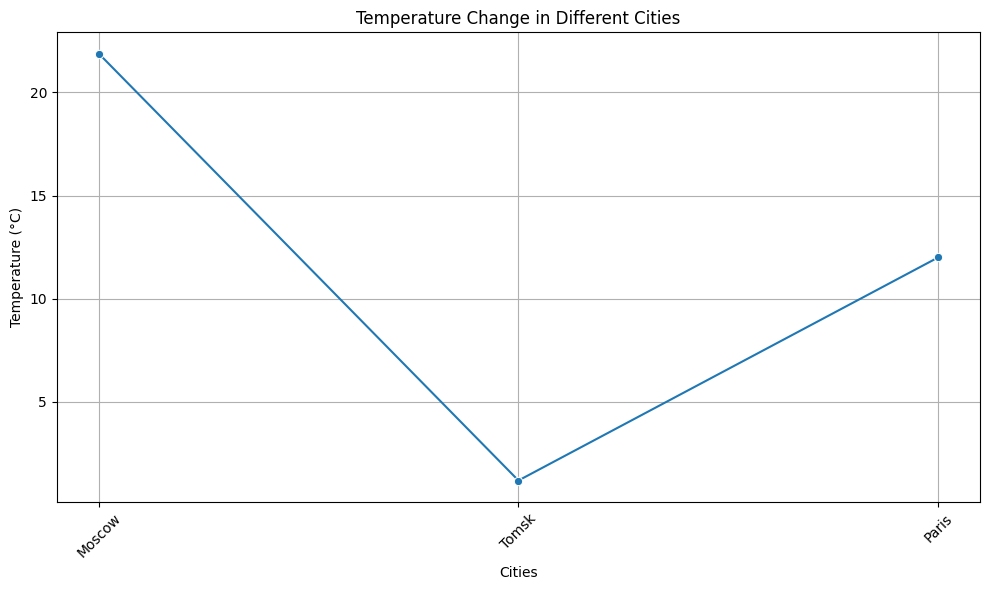

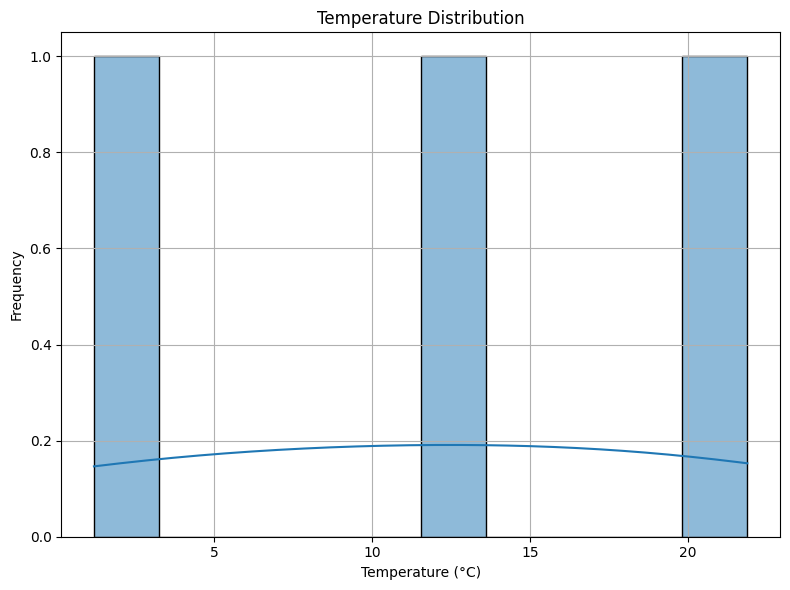

In [39]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from hdfs import InsecureClient

with open('weather_data.json', 'r') as file:
    weather_data = json.load(file)

temperature_data = []

for city, data in weather_data.items():
    temperature = data['data']['timelines'][0]['intervals'][0]['values']['temperature']
    temperature_data.append((city, temperature))

df = pd.DataFrame(temperature_data, columns=['City', 'Temperature'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='City', y='Temperature', marker='o')
plt.title('Temperature Change in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_change.png')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_distribution.png')
plt.show()